### Ensemble of Estimators

The normal ensemble of trees is produced using the `sklearn.ensemble.BaggingClassifier`. This uses the logic of combining the results of weak learners (decision trees) to make one strong learner (average). This reduces the variance of the model but increases the overall bias.

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [2]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

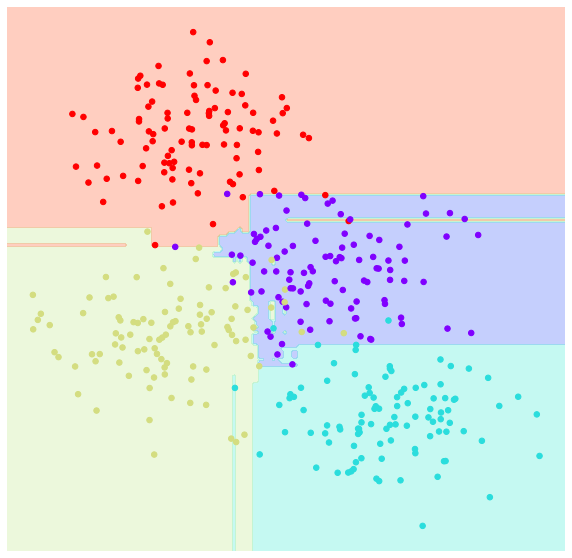

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import numpy as np
from sklearn.datasets import make_blobs

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)
X, y = make_blobs(n_samples=400, centers=4, random_state=0, cluster_std=1.0)

bag.fit(X, y)
visualize_classifier(bag, X, y)

### Improving the performance - Randomized Ensemble Estimator

The randomization comes from randomly selecting the top of the several features from the set of features that generates the clusters. This is done using the `sklearn.tree.RandomForestClassifier`. Here, we can conclude that using randomized feature selection will create splits in the parameter space which is much inline with intuition.

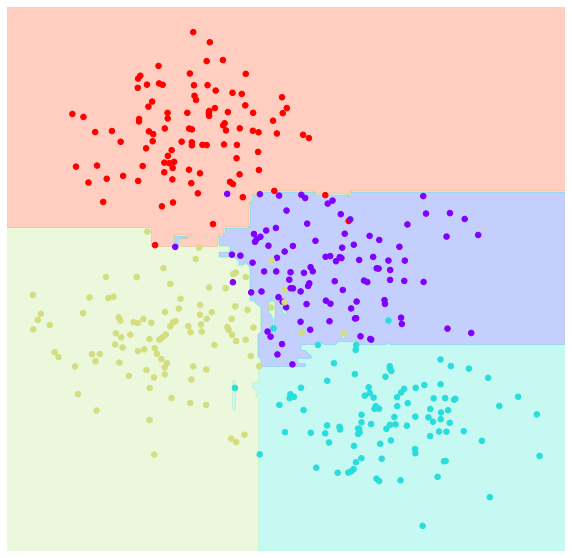

In [4]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);